In [ ]:
import numpy as np
from scipy.stats import moment 
import matplotlib.pyplot as plt

In [17]:
N = 100
theta = 52

np.random.seed(42)
data = np.random.randint(theta, 2 * theta, N)
theta_est = 2 / 3 * (np.sum(data) / N)

In [18]:
alpha = 0.05

left0 = np.max(data) / (1 + (1 - alpha / 2) ** (1 / N))
right0 = np.max(data) / (1 + (alpha / 2) ** (1 / N))

print(f"Точный ДИ: [{left0:.3f}, {right0:.3f}]")
print(f"Размах: {right0 - left0:.3f}")

Точный ДИ: [51.507, 52.450]
Размах: 0.943


In [19]:
data_sq = data ** 2
left1 = -1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(data_sq) - (0.01 * np.sum(data)) ** 2) + theta_est
right1 = 1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(data_sq) - (0.01 * np.sum(data)) ** 2) + theta_est
print(f"Асимптотический интервал: [{left1:.3f}, {right1:.3f}]")
print("Размах:", right1 - left1)

Асимптотический интервал: [49.629, 53.504]
Размах: 3.875560997957436


In [20]:
M = np.array([])
for i in range(1000):
    M = np.append(M, 2 / 3 * np.mean(np.random.choice(data, size = len(data))) - 2 / 3 * np.mean(data))

M = np.sort(M)

left2 = 2 / 3 * np.mean(data) + M[24]
right2 = 2 / 3 * np.mean(data) + M[974]

print(f"Бутстраопвский интервал: [{left2:.3f}, {right2:.3f}]")
print(f"Размах: {right2 - left2:.3f}")

Бутстраопвский интервал: [49.640, 53.447]
Размах: 3.807


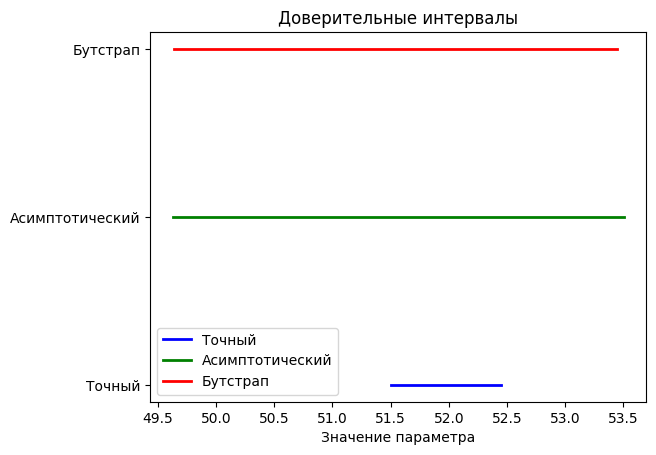

In [21]:
x1 = np.linspace(left0, right0, 100)
y1 = [1] * 100 

x2 = np.linspace(left1, right1, 100)
y2 = [2] * 100

x3 = np.linspace(left2, right2, 100)
y3 = [3] * 100

plt.plot(x1, y1, label="Точный", color="blue", linewidth=2)
plt.plot(x2, y2, label="Асимптотический", color="green", linewidth=2)
plt.plot(x3, y3, label="Бутстрап", color="red", linewidth=2)

plt.legend()

plt.yticks([1, 2, 3], ["Точный", "Асимптотический", "Бутстрап"])
plt.xlabel("Значение параметра")
plt.title("Доверительные интервалы")

plt.show()